In [275]:
import numpy as np
import operator
from functools import reduce
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import math as m
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
from testCases import *
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [276]:
def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    

    plt.scatter(train_X[0, :], train_X[1, :], c=reduce(operator.add, train_Y), s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

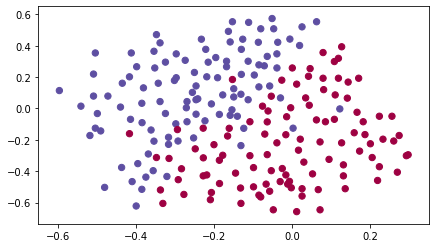

In [277]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each point on the plot corresponds to the position on the field where a player has hit the ball with his/her head after the goalkeeper has hit the ball from left of the football field.

The given model can be used in 

1. dropout mode -- setting the value of keep_prob less than 1
2. regularised mode -- setting the lambd input to non-zero value.


The functions that need to be implemented are:

1 -=  Dropout functions --> forward_propagation_with_dropout(A, Y, parameters, keep_prob), backward_propagation_with_regularization(X, Y, caches, keep_prob)

<l>2 -=  L2 regularisation functions --> " compute_cost_with_regulairsation(A, Y, parameters, lambd) ", backward_propagation_with_regularisation(X, Y, caches, lambd).</l>




In [278]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((2, 211), (1, 211), (2, 200), (1, 200))

#functions availabale with me.

forward_propagation()  -- > gives you output of your neural net.
compute_cost           -- > uses the output of the neural net to compute the cost.
back_propagation()     -- > gives the grads of all the intermediate parameters with respect to the cost func.

steps involved in any model's computation.

Loop Over.

1. find the output of the forward_propagation using the parameters.
2. compute the cost function using the activations of the output layer and Y
3. find gradients wrt parameters using caches obtained from forward_prop.
4. update parameters using the learning_rate and gradients obtained.


In [279]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1): #by default this function runs in a non dropout and non-regularised mode.
    
    ''' Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID. '''
    '''The model can work just in one mode at a time i.e either in dropout mode or in regularised mode'''
    
    layer_dims = [X.shape[0], 20, 3, 1]
    parameters = initialize_parameters(layer_dims)
    grads = {}
    costs = [] #upon the successfull completion of the following loop this list will have 30 values
    
    for i in range (num_iterations):
        
        #compute activations of the output layer.
        if(keep_prob < 1): # dropout mode ON.
             AL, caches = forward_propagation_with_dropout(X, parameters, keep_prob)
        elif (keep_prob == 1):    
             AL, caches = forward_propagation(X, parameters)
       
        #compute cost
        if(lambd == 0):
            cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        
        #backpropagation
        assert(lambd == 0 or keep_prob ==1) #preventing the model to turn on both regularization and dropout at the same time.
        
        
        if lambd==0 and keep_prob==1: #none turned on
            grads = backward_propagation(X, Y, caches)
           
        
        elif keep_prob < 1: #dropout turned on
            grads = backward_propagation_with_dropout(X, Y, caches, keep_prob)
        
        elif lambd != 0: #regularization turned on
             grads = backward_propagation_with_regularization(X, Y, caches, lambd)
                
        
        #update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
         #update parameters throws some values , you catch those values in the paramaeter var and loose contact with the previous parameter values.
        
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
            
    # the end result are trained parameters.
    
    plt.plot(costs) # plots costs against the index of costs lists. 
    plt.title("learning_rate = "+str(learning_rate))
    plt.xlabel("x1000 iter")
    plt.ylabel("cost")
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724213
Cost after iteration 20000: 0.1385164242325169


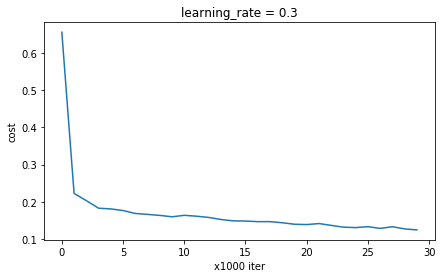

on the training set:
Accuracy: 0.9478672985781991
on the testing set:
Accuracy: 0.915


In [280]:
# Non regularised model.
parameters = model(train_X, train_Y)
print("on the training set:")
predicitons_train = predict(train_X, train_Y, parameters)
print("on the testing set:")
predictions_test  = predict(test_X, test_Y, parameters)

In [281]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, y), cmap=plt.cm.Spectral)
    plt.show()

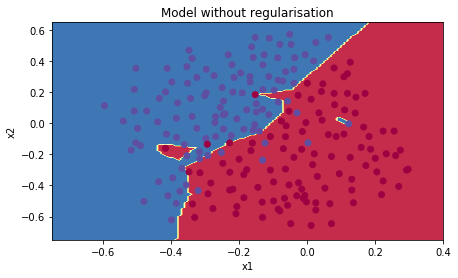

In [282]:
plt.title("Model without regularisation")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
plt.show()

THE MODEL IS OVERFITTING. ITS FITTING THE NOISY POINTS.

THE REGULARISED ( L2 regularised model )



$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

In [283]:
lambd = 0.7 
m = 20

W1 = np.random.randn(4,3)*0.01
W2 = np.random.randn(4,4)*0.01

W1_norm = np.sum(np.square(W1))
W2_norm = np.sum(np.square(W2))

L2_cost = lambd*(W1_norm+W2_norm)/(2*m)
L2_cost

2.4204430364209934e-05

In [284]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):#for a 3 layer_NN.

    m  = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(AL, Y)
    
    W1_norm = np.sum(np.square(W1)) 
    W2_norm = np.sum(np.square(W2)) 
    W3_norm = np.sum(np.square(W3))
    
    L2_regularization_cost = lambd * (W1_norm + W2_norm + W3_norm)/(2*m)
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [285]:
AL, Y_assess, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(AL, Y_assess, parameters, lambd = 0.1)

print("cost : "+str(cost))

cost : 1.7864859451590758


In [286]:
A2 = np.array([[2],[-21],[-34],[43],[0],[76]])
print(A2.shape)


(A2 > 0)*1

(6, 1)


array([[1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [287]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    
    m = X.shape[1]
    Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3 = cache
    
    dZ3 = A3 - Y #step 1 in backprop computation graph. What is dA3 used for then     
    
    dW3 =  1./m * np.dot(dZ3, A2.T) + lambd*W3/m
    db3 =  1./m * np.sum(dZ3, axis = 1, keepdims = True) #no regularization term required for this
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd*W2/m
    db2 = 1./m * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0)) #didnot get it.
    
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd*W1/m
    db1 = 1./m * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = { "dZ3":dZ3, "dW3":dW3, "db3":db3, "dA2": dA2,
                 "dZ2":dZ2, "dW2":dW2, "db2":db2, "dA1": dA1,
                 "dZ1":dZ1, "dW1":dW1, "db1":db1 }
    
    return gradients
    

In [288]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()
grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)

print ("dW1  = \n " +str(grads["dW1"]))
print ("dW2  = \n " +str(grads["dW2"]))
print ("dW3  = \n " +str(grads["dW3"]))

dW1  = 
 [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2  = 
 [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3  = 
 [[-1.77691347 -0.11832879 -0.09397446]]


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.26809163371273004


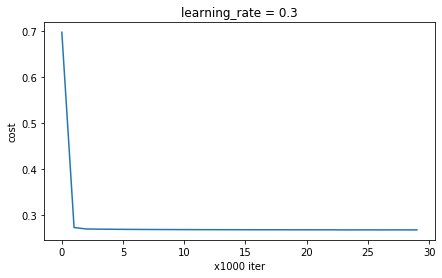

on the train set:
Accuracy: 0.9383886255924171
on the test set:
Accuracy: 0.93


In [289]:
#REGULARIZED MODEL
parameters = model(train_X, train_Y, lambd = .7)
print("on the train set:")
prediction_train = predict(train_X, train_Y, parameters)
print("on the test set:")
predictions_test = predict(test_X, test_Y, parameters)

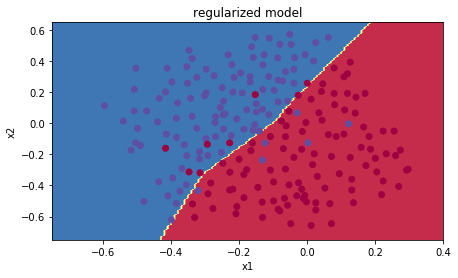

In [290]:
plt.title("regularized model")
axes = plt.gca()
axes.set_xlim([-0.75, 0.40])
axes.set_ylim([-0.75, 0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)
plt.show()

2. Adding Dropout to a layer.


In [291]:
parameters = initialize_parameters([3,2,1])
W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]


In [292]:
def forward_propagation_with_dropout(X, parameters, keep_prob):
    
    np.random.seed(1)
    #dropout is added to first and second hidden layer.
    W1, b1, W2, b2, W3, b3 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"], parameters["W3"], parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = np.int64(D1 < keep_prob) #it will be matrix where in each column there are keep_prob*100 1's and (1-keep_prob)*100 0's
    A1 *= D1
    A1 /= keep_prob
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = np.int64(D2 < keep_prob)
    A2 *= D2
    A2 /= keep_prob
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, 
             Z2, D2, A2, W2, b2, 
             Z3, A3, W3, b3)
    
    return A3, cache
    

In [293]:
X_assess, parameters = forward_propagation_with_dropout_test_case()
A3, cache = forward_propagation_with_dropout(X_assess, parameters, 0.7)
print("A3:" +str(A3))

A3:[[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


In [294]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    
    m = X.shape[1]
    Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3  = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m* np.dot(dZ3, A2.T)
    db3 = 1./m* np.sum(dZ3, axis = 1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dA2 *= D2
    dA2/= keep_prob
    
    dZ2 = np.multiply(dA2, np.int64(A2>0))
    dW2 = 1./m* np.dot(dZ2, A1.T)
    db2 = 1./m* np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dA1*= D1
    dA1/= keep_prob
    
    dZ1 = np.multiply(dA1, np.int64(A1>0))
    dW1 = 1./m* np.dot(dZ1, X.T)
    db1 = 1./m* np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {"dZ3":dZ3, "dW3":dW3, "db3":db3, "dA2":dA2, 
                 "dZ2":dZ2, "dW2":dW2, "db2":db2, "dA1":dA1, 
                 "dZ1":dZ1, "dW1":dW1, "db1":db1 }
    
    return gradients

In [295]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, 0.8)
print("dA1 = \n" + str(gradients["dA1"]))
print("dA2 = \n" + str(gradients["dA2"]))


dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


ALL Functions Ready. Lets train The model.

Cost after iteration 0: 0.6543912405149825


/Users/jatinsaini/reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/jatinsaini/reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


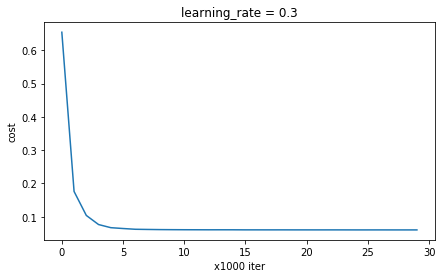

On the training set:
Accuracy: 0.9289099526066351
On the testing set:
Accuracy: 0.95


In [296]:
parameters = model(train_X, train_Y, learning_rate = 0.3, keep_prob = 0.86)

print("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the testing set:")
predictions_test  = predict(test_X, test_Y, parameters)

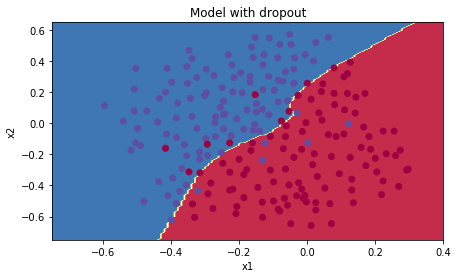

In [297]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### Points to remember about dropout technique

1. Dropout is a regularization technique
2.You can only use dropout during training.
3.Apply dropout both during forward_propagation and backward_propagation
4.During training_time divide each dropout layer by keep_prob to keep the same expected value for the         activations.(To not change the output because of the dropout layer, we divide the output of the dropout layer by keep prob because on application of dropout, our output is scaled by keep_prob since we have only (keep_prob*100) % of the nodes contributing towards the output.



1.Dropout should not be used with testing data, should only be used on training/

In [5]:
x = '34'*2
print(x)

3434


In [6]:
s = 'simran'
l = list(s)
print(l)

['s', 'i', 'm', 'r', 'a', 'n']


In [7]:
a = list(range(0, -9, -1))
type(a)

list